# White Owl

Pre-requisites:
1. Create a Twitter App and have the following details handy
[consumer_key, consumer_secret, access_token, access_secret ]

Steps:
1. Gather tweets
2. Write to output file
3. Process the tweets
4. Remove stopwords


In [1]:
import tweepy
import string
import json
import re
from tweepy import OAuthHandler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [2]:
emoticons_str = r"""
    (?:
        [:=;] # Eyes
        [oO\-]? # Nose (optional)
        [D\)\]\(\]/\\OpP] # Mouth
    )"""
 
regex_str = [
    emoticons_str,
    r'<[^>]+>', # HTML tags
    r'(?:@[\w_]+)', # @-mentions
    r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", # hash-tags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
 
    r'(?:(?:\d+,?)+(?:\.?\d+)?)', # numbers
    r"(?:[a-z][a-z'\-_]+[a-z])", # words with - and '
    r'(?:[\w_]+)', # other words
    r'(?:\S)' # anything else
]

In [3]:
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)
 
def tokenize(s):
    return tokens_re.findall(s)
 
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [4]:
consumer_key = 'GLGegHd74hUzgowpfhvrWCOLVY'
consumer_secret = 'J8cVwxr7hPt9Lxhlaahd9OdN8pASEPl144tjxjaGahrhr3NQ8Nj'
access_token = '30668617091-vOsRv6CTluPzgDpzeYCpCnUX91mT3cHeBeJkzuF'
access_secret = 'yxbRjzo7ri1JJAJ25jNKC21ZgKtKpWKSaR1jkPq7UBpu6H'

In [5]:
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
 
api = tweepy.API(auth)

In [6]:
def write_to_file(tmp):
    with open('white_owl.json', 'a') as outfile:
        json.dump(tmp, outfile)

In [7]:
'''
Print 10 tweets 
for status in tweepy.Cursor(api.home_timeline).items(10):
    # prints latest 10 tweets in timeline!
    print(status.text)
'''

'\nPrint 10 tweets \nfor status in tweepy.Cursor(api.home_timeline).items(10):\n    # prints latest 10 tweets in timeline!\n    print(status.text)\n'

In [8]:
# DATA !!
for status in tweepy.Cursor(api.home_timeline).items(1):
    # Process latest 10 tweets
    write_to_file(status._json)

{"created_at": "Tue Jun 26 16:36:18 +0000 2018", "id": 1011649365209952256, "id_str": "1011649365209952256", "text": "The new Angular HttpClient API\n\n\u261e https://t.co/AsJmvnC5Nm\n\n#Angular #javascript https://t.co/uLCoHqvf5H", "truncated": false, "entities": {"hashtags": [{"text": "Angular", "indices": [59, 67]}, {"text": "javascript", "indices": [68, 79]}], "symbols": [], "user_mentions": [], "urls": [{"url": "https://t.co/AsJmvnC5Nm", "expanded_url": "https://ift.tt/2xtKTXL", "display_url": "ift.tt/2xtKTXL", "indices": [34, 57]}], "media": [{"id": 1011649364014575616, "id_str": "1011649364014575616", "indices": [80, 103], "media_url": "http://pbs.twimg.com/media/DgoZvJNWsAAQSKB.jpg", "media_url_https": "https://pbs.twimg.com/media/DgoZvJNWsAAQSKB.jpg", "url": "https://t.co/uLCoHqvf5H", "display_url": "pic.twitter.com/uLCoHqvf5H", "expanded_url": "https://twitter.com/javascript_fan/status/1011649365209952256/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1024, "h": 678, "resize": "fit"}, "large": {"w": 1024, "h": 678, "resize": "fit"}, "small": {"w": 680, "h": 450, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 1011649364014575616, "id_str": "1011649364014575616", "indices": [80, 103], "media_url": "http://pbs.twimg.com/media/DgoZvJNWsAAQSKB.jpg", "media_url_https": "https://pbs.twimg.com/media/DgoZvJNWsAAQSKB.jpg", "url": "https://t.co/uLCoHqvf5H", "display_url": "pic.twitter.com/uLCoHqvf5H", "expanded_url": "https://twitter.com/javascript_fan/status/1011649365209952256/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 1024, "h": 678, "resize": "fit"}, "large": {"w": 1024, "h": 678, "resize": "fit"}, "small": {"w": 680, "h": 450, "resize": "fit"}}}]}, "source": "<a href=\"https://ifttt.com\" rel=\"nofollow\">IFTTT</a>", "in_reply_to_status_id": null, "in_reply_to_status_id_str": null, "in_reply_to_user_id": null, "in_reply_to_user_id_str": null, "in_reply_to_screen_name": null, "user": {"id": 3307460762, "id_str": "3307460762", "name": "JavaScript FAN", "screen_name": "javascript_fan", "location": "", "description": "#JavaScript is The Most Important Programming Language on Earth", "url": "https://t.co/6q1z4HevTM", "entities": {"url": {"urls": [{"url": "https://t.co/6q1z4HevTM", "expanded_url": "https://goo.gl/IGw9Lk", "display_url": "goo.gl/IGw9Lk", "indices": [0, 23]}]}, "description": {"urls": []}}, "protected": false, "followers_count": 16832, "friends_count": 6510, "listed_count": 336, "created_at": "Thu Aug 06 04:04:59 +0000 2015", "favourites_count": 88, "utc_offset": null, "time_zone": null, "geo_enabled": false, "verified": false, "statuses_count": 4135, "lang": "en", "contributors_enabled": false, "is_translator": false, "is_translation_enabled": false, "profile_background_color": "C0DEED", "profile_background_image_url": "http://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_image_url_https": "https://abs.twimg.com/images/themes/theme1/bg.png", "profile_background_tile": false, "profile_image_url": "http://pbs.twimg.com/profile_images/634644295618658304/UuIqtEJ8_normal.png", "profile_image_url_https": "https://pbs.twimg.com/profile_images/634644295618658304/UuIqtEJ8_normal.png", "profile_banner_url": "https://pbs.twimg.com/profile_banners/3307460762/1440146431", "profile_link_color": "1DA1F2", "profile_sidebar_border_color": "C0DEED", "profile_sidebar_fill_color": "DDEEF6", "profile_text_color": "333333", "profile_use_background_image": true, "has_extended_profile": false, "default_profile": true, "default_profile_image": false, "following": true, "follow_request_sent": false, "notifications": false, "translator_type": "none"}, "geo": null, "coordinates": null, "place": null, "contributors": null, "is_quote_status": false, "retweet_count": 0, "favorite_count": 0, "favorited": false, "retweeted": false, "possibly_sensitive": false, "possibly_sensitive_appealable": false, "lang": "en"}

In [10]:
with open('white_owl.json', 'r') as f:
    line = f.readline() # read only the first tweet/line
    tweet = json.loads(line) # load it as Python dict
    var = str(tweet)
    print(json.dumps([tweet], indent=4)) # pretty-print
    

[
    {
        "created_at": "Tue Jun 26 16:36:18 +0000 2018",
        "id": 1011649365209952256,
        "id_str": "1011649365209952256",
        "text": "The new Angular HttpClient API\n\n\u261e https://t.co/AsJmvnC5Nm\n\n#Angular #javascript https://t.co/uLCoHqvf5H",
        "truncated": false,
        "entities": {
            "hashtags": [
                {
                    "text": "Angular",
                    "indices": [
                        59,
                        67
                    ]
                },
                {
                    "text": "javascript",
                    "indices": [
                        68,
                        79
                    ]
                }
            ],
            "symbols": [],
            "user_mentions": [],
            "urls": [
                {
                    "url": "https://t.co/AsJmvnC5Nm",
                    "expanded_url": "https://ift.tt/2xtKTXL",
                    "display_url": "ift.tt/2xtK

In [11]:
print(word_tokenize(json.dumps(tweet)))

['{', '``', 'created_at', "''", ':', '``', 'Tue', 'Jun', '26', '16:36:18', '+0000', '2018', "''", ',', '``', 'id', "''", ':', '1011649365209952256', ',', '``', 'id_str', "''", ':', '``', '1011649365209952256', "''", ',', '``', 'text', "''", ':', '``', 'The', 'new', 'Angular', 'HttpClient', 'API\\n\\n\\u261e', 'https', ':', '//t.co/AsJmvnC5Nm\\n\\n', '#', 'Angular', '#', 'javascript', 'https', ':', '//t.co/uLCoHqvf5H', "''", ',', '``', 'truncated', "''", ':', 'false', ',', '``', 'entities', "''", ':', '{', '``', 'hashtags', "''", ':', '[', '{', '``', 'text', "''", ':', '``', 'Angular', "''", ',', '``', 'indices', "''", ':', '[', '59', ',', '67', ']', '}', ',', '{', '``', 'text', "''", ':', '``', 'javascript', "''", ',', '``', 'indices', "''", ':', '[', '68', ',', '79', ']', '}', ']', ',', '``', 'symbols', "''", ':', '[', ']', ',', '``', 'user_mentions', "''", ':', '[', ']', ',', '``', 'urls', "''", ':', '[', '{', '``', 'url', "''", ':', '``', 'https', ':', '//t.co/AsJmvnC5Nm', "''", ','

In [12]:
tweet_details = preprocess(str(tweet))

In [13]:
tweet_details

['{',
 "'",
 'created_at',
 "'",
 ':',
 "'",
 'Tue',
 'Jun',
 '26',
 '16',
 ':',
 '36',
 ':',
 '18',
 '+',
 '0000',
 '2018',
 "'",
 ',',
 "'",
 'id',
 "'",
 ':',
 '1011649365209952256,',
 "'",
 'id_str',
 "'",
 ':',
 "'",
 '1011649365209952256',
 "'",
 ',',
 "'",
 'text',
 "'",
 ':',
 "'",
 'The',
 'new',
 'Angular',
 'HttpClient',
 'API',
 '\\',
 'n',
 '\\',
 'n',
 '☞',
 'https://t.co/AsJmvnC5Nm\\n\\n',
 '#Angular',
 '#javascript',
 "https://t.co/uLCoHqvf5H',",
 "'",
 'truncated',
 "'",
 ':',
 'False',
 ',',
 "'",
 'entities',
 "'",
 ':',
 '{',
 "'",
 'hashtags',
 "'",
 ':',
 '[',
 '{',
 "'",
 'text',
 "'",
 ':',
 "'",
 'Angular',
 "'",
 ',',
 "'",
 'indices',
 "'",
 ':',
 '[',
 '59,',
 '67',
 ']',
 '}',
 ',',
 '{',
 "'",
 'text',
 "'",
 ':',
 "'",
 'javascript',
 "'",
 ',',
 "'",
 'indices',
 "'",
 ':',
 '[',
 '68,',
 '79',
 ']',
 '}',
 ']',
 ',',
 "'",
 'symbols',
 "'",
 ':',
 '[',
 ']',
 ',',
 "'",
 'user_mentions',
 "'",
 ':',
 '[',
 ']',
 ',',
 "'",
 'urls',
 "'",
 ':',
 '[',
 '{

In [14]:
set(tweet_details)

{'#Angular',
 '#JavaScript',
 '#javascript',
 "'",
 '+',
 ',',
 '.',
 '/',
 '0,',
 '0000',
 '04',
 '06',
 '1',
 '1011649364014575616',
 '1011649364014575616,',
 '1011649365209952256',
 '1011649365209952256,',
 '1024,',
 '103',
 '150,',
 '16',
 '16832,',
 '18',
 '2',
 '2015',
 '2018',
 '23',
 '26',
 '3307460762',
 '3307460762,',
 '333333',
 '336,',
 '34,',
 '36',
 '4135,',
 '450,',
 '5',
 '57',
 '59',
 '59,',
 '6',
 '6510,',
 '67',
 '678,',
 '68,',
 '680,',
 '79',
 '80,',
 '88,',
 '9',
 ':',
 '</a>',
 '<a href="https://ifttt.com" rel="nofollow">',
 'API',
 'Angular',
 'Aug',
 'C0DEED',
 'DA1F2',
 'DDEEF',
 'Earth',
 'FAN',
 'False',
 'H',
 'HttpClient',
 'IFTTT',
 'IGw',
 'Important',
 'JavaScript',
 'Jun',
 'Language',
 'Lk',
 'Most',
 'None',
 'Programming',
 'The',
 'Thu',
 'True',
 'Tue',
 '[',
 '\\',
 ']',
 'com',
 'contributors',
 'contributors_enabled',
 'coordinates',
 'created_at',
 'crop',
 'default_profile',
 'default_profile_image',
 'description',
 'display_url',
 'en',
 'e

In [15]:
punctuation = list(string.punctuation)
stop = stopwords.words('english') + punctuation + ['rt', 'via']

In [16]:
stop

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [17]:
terms_stop = [term for term in preprocess(str(tweet['text'])) if term not in stop]

In [18]:
terms_stop

['The',
 'new',
 'Angular',
 'HttpClient',
 'API',
 '☞',
 'https://t.co/AsJmvnC5Nm',
 '#Angular',
 '#javascript',
 'https://t.co/uLCoHqvf5H']

### The Actual Tweet!

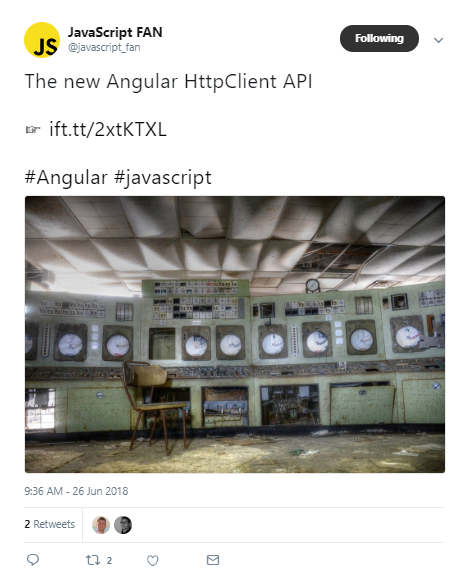

In [19]:
tweet_details = preprocess(str(tweet))

In [20]:
set(tweet_details)

{'#Angular',
 '#JavaScript',
 '#javascript',
 "'",
 '+',
 ',',
 '.',
 '/',
 '0,',
 '0000',
 '04',
 '06',
 '1',
 '1011649364014575616',
 '1011649364014575616,',
 '1011649365209952256',
 '1011649365209952256,',
 '1024,',
 '103',
 '150,',
 '16',
 '16832,',
 '18',
 '2',
 '2015',
 '2018',
 '23',
 '26',
 '3307460762',
 '3307460762,',
 '333333',
 '336,',
 '34,',
 '36',
 '4135,',
 '450,',
 '5',
 '57',
 '59',
 '59,',
 '6',
 '6510,',
 '67',
 '678,',
 '68,',
 '680,',
 '79',
 '80,',
 '88,',
 '9',
 ':',
 '</a>',
 '<a href="https://ifttt.com" rel="nofollow">',
 'API',
 'Angular',
 'Aug',
 'C0DEED',
 'DA1F2',
 'DDEEF',
 'Earth',
 'FAN',
 'False',
 'H',
 'HttpClient',
 'IFTTT',
 'IGw',
 'Important',
 'JavaScript',
 'Jun',
 'Language',
 'Lk',
 'Most',
 'None',
 'Programming',
 'The',
 'Thu',
 'True',
 'Tue',
 '[',
 '\\',
 ']',
 'com',
 'contributors',
 'contributors_enabled',
 'coordinates',
 'created_at',
 'crop',
 'default_profile',
 'default_profile_image',
 'description',
 'display_url',
 'en',
 'e

### References

1. Mining Twitter Data with Python
https://marcobonzanini.com/2015/03/02/mining-twitter-data-with-python-part-1/